# Predixion AI Engineering Assignment

In [10]:
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
from googletrans import Translator

translator = Translator()

In [11]:
conversation_path = 'conversation.txt'
with open(conversation_path, encoding="utf8") as file:
    text = file.read()

In [12]:
hindi_punctuation = '|,!?;:'
all_punctuation = string.punctuation + hindi_punctuation
cleaned_text = text.translate(str.maketrans('', '', all_punctuation))
cleaned_text

'Recovery Agent RA नमस्ते श्री कुमार मैं एक्स वाई जेड फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी।\n\nBorrower B हां बोलिए। क्या बात है\n\nRA सर आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है\n\nB हां थोड़ी दिक्कत है। मेरी नौकरी चली गई है और मैं नया काम ढूंढ रहा हूं।\n\nRA ओह यह तो बुरा हुआ। लेकिन सर आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है।\n\nB मैं समझता हूं लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है\n\nRA हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं\n\nB मैं कोशिश करूंगा लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा\n\nRA ठीक है आधा भुगतान अगले हफ्ते तक कर दीजिए। बाकी का क्या प्लान है आपका\n\nB मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा। तब मैं बाकी बकाया चुका दूंगा।\n\nRA ठीक है। तो हम ऐसा करते हैं  आप अगले हफ्ते तक आधा EMI जमा कर दीजिए और अगले महीने के 15 तारीख तक बाकी का भुगतान कर दीजिए। क्या यह आपको स्वीकार है\n\nB हां यह ठीक रहेगा। मैं इस प्लान का पालन करने की पूरी कोशिश 

In [14]:
ra_sentences = []
borrower_sentences = []
overall_sentences = []
ra = ""
borrower = ""
for line in cleaned_text.splitlines():
    if line.startswith("R"):
        ra_sentences.append(line[3:].strip())
        overall_sentences.append(line[3:].strip())
        ra += line[3:].strip()
    elif line.startswith("B"):
        borrower_sentences.append(line[2:].strip())
        overall_sentences.append(line[2:].strip())
        borrower += line[2:].strip()

In [15]:
def analyze_sentiment_english(sentence):
    try:
        translation = translator.translate(sentence, dest='en').text
        analysis = TextBlob(translation)
        return analysis.sentiment.polarity
    except Exception as e:
        print(f"Translation/Analysis Error: {e}")
        return 0

# Sentiment Analysis And Graph Plotting

Recovery Agent Sentiments throughout the conversation:  [0.0, -0.16666666666666666, 0.52, 0.0, 0.11111111111111112, -0.05555555555555555, 0.2, -0.125]

Borrower Sentiment throughout the conversation: [0.0, 0.13636363636363635, 0.2857142857142857, 0.22777777777777777, 0.06818181818181818, 1.0, 0.35, 0.0]

Recovery Agent Sentiment Overall:  0.17106060606060602

Borrower Sentiment Overall: 0.2564935064935065

Overall Sentiment thourghout the conversation: [0.0, -0.16666666666666666, 0.52, 0.0, 0.11111111111111112, -0.05555555555555555, 0.2, -0.125, 0.0, 0.13636363636363635, 0.2857142857142857, 0.22777777777777777, 0.06818181818181818, 1.0, 0.35, 0.0]

Overall Sentiment of the Conversation: 0.19712613144431324

Recovery Agent had POSITIVE SENTIMENT

Borrower had POSITIVE SENTIMENT



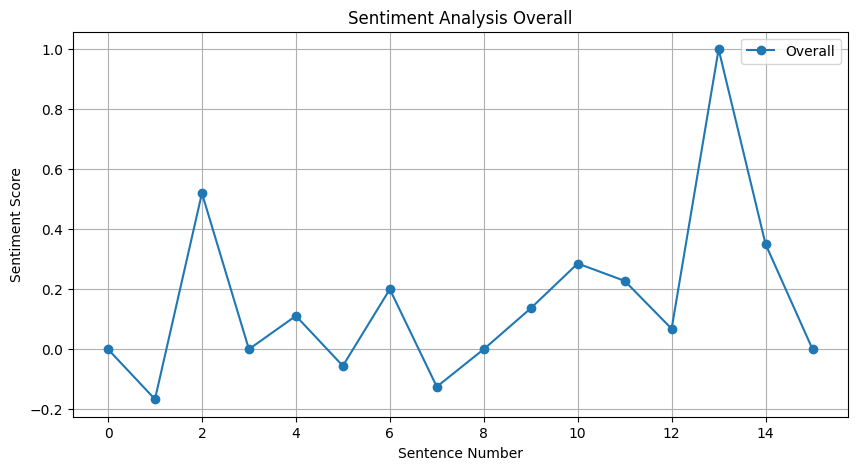

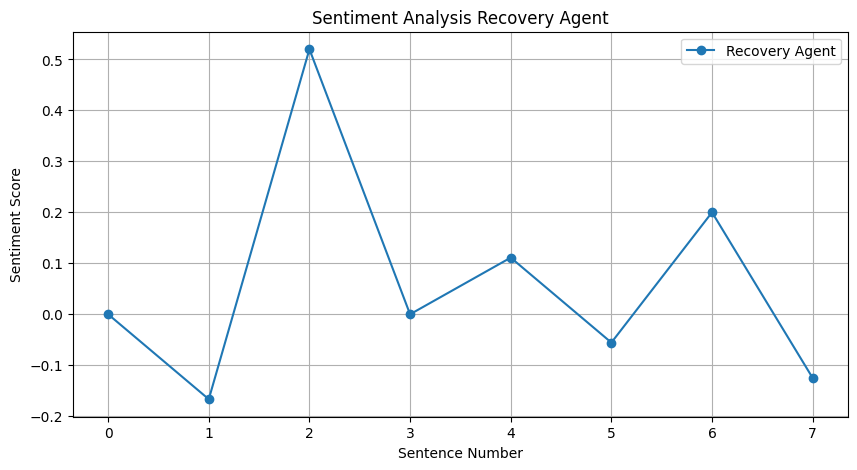

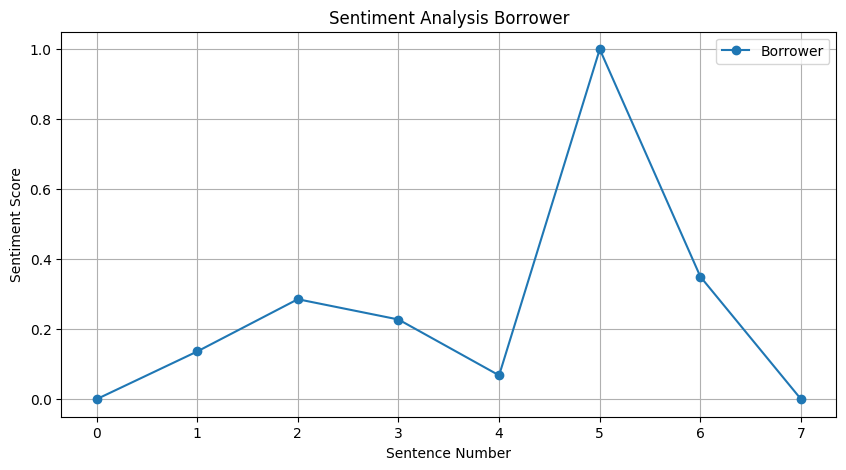

In [17]:
def sentiment_analyze():
    ra_sentiments = [analyze_sentiment_english(sentence) for sentence in ra_sentences]
    borrower_sentiments = [analyze_sentiment_english(sentence) for sentence in borrower_sentences]
    overall_sentiments = [analyze_sentiment_english(sentence) for sentence in ra_sentences + borrower_sentences]
    overall = analyze_sentiment_english(cleaned_text)
    ra_overall = analyze_sentiment_english(ra)
    borrower_overall = analyze_sentiment_english(borrower)

    print(f"Recovery Agent Sentiments throughout the conversation:  {ra_sentiments}\n")
    print(f"Borrower Sentiment throughout the conversation: {borrower_sentiments}\n")
    print(f"Recovery Agent Sentiment Overall:  {ra_overall}\n")
    print(f"Borrower Sentiment Overall: {borrower_overall}\n")
    print(f"Overall Sentiment thourghout the conversation: {overall_sentiments}\n")
    print(f"Overall Sentiment of the Conversation: {overall}\n")

    if ra_overall > 0:
        print("Recovery Agent had POSITIVE SENTIMENT\n")
    elif ra_overall < 0:
        print("Recovery Agent had NEGATIVE SENTIMENT\n")
    else:
        print("Recovery Agent had NEUTRAL SENTIMENT\n")

    if borrower_overall > 0:
        print("Borrower had POSITIVE SENTIMENT\n")
    elif borrower_overall < 0:
        print("Borrower had NEGATIVE SENTIMENT\n")
    else:
        print("Borrower had NEUTRAL SENTIMENT\n")

    # Plotting Overall Sentiment
    plt.figure(figsize=(10, 5))
    plt.plot(overall_sentiments, marker='o', linestyle='-', label="Overall")
    plt.title("Sentiment Analysis Overall")
    plt.xlabel("Sentence Number")
    plt.ylabel("Sentiment Score")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plotting Recovery Agent Sentiment
    plt.figure(figsize=(10, 5))
    plt.plot(ra_sentiments, marker='o', linestyle='-', label="Recovery Agent")
    plt.title("Sentiment Analysis Recovery Agent")
    plt.xlabel("Sentence Number")
    plt.ylabel("Sentiment Score")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plotting Borrower Sentiment
    plt.figure(figsize=(10, 5))
    plt.plot(borrower_sentiments, marker='o', linestyle='-', label="Borrower")
    plt.title("Sentiment Analysis Borrower")
    plt.xlabel("Sentence Number")
    plt.ylabel("Sentiment Score")
    plt.grid(True)
    plt.legend()
    plt.show()

sentiment_analyze()

# Finding Summary and Next Steps

In [24]:
from langchain_google_genai import GoogleGenerativeAI
from tqdm.notebook import tqdm

llm = GoogleGenerativeAI(model="gemini-1.5-flash", google_api_key="YOUR_API_KEY")

In [25]:
def summary(text):
    training_data = text
    prompt = """Analyze the provided Hindi conversation between a recovery agent and a borrower regarding a default payment. Your analysis should include:
                1. A concise summary of the conversation (in English) (not more than 100 words)
            """
    
    response = llm.invoke(prompt+"\n"+training_data)

    return response


In [26]:
def next_steps(text):
    training_data = text
    prompt = """Analyze the provided Hindi conversation between a recovery agent and a borrower regarding a default payment. Your analysis should include:
                1. Key actions or next steps identified from the conversation
                   For key actions, list 3-5 bullet points.
            """

    response = llm.invoke(prompt+"\n"+training_data)

    return response


In [27]:
def sentiment_g(text):
    training_data = text
    prompt = """Analyze the provided Hindi conversation between a recovery agent and a borrower regarding a default payment. Your analysis should include:
                1. Sentiment analysis of both the recovery agent and the borrower
                In the sentiment analysis, discuss the overall tone of each participant and how it changes throughout the conversation (Initial, Mid, End). Use specific examples from the text to support your analysis (convert the example text to English if necessary). 
            """

    response = llm.invoke(prompt+"\n"+training_data)

    return response

# OUTPUT

## Summary

In [28]:
summary(text=text)

"The conversation is between a recovery agent from XYZ Finance and a borrower who has missed a loan payment. The borrower explains that he lost his job and is struggling to make the payment. The agent understands the borrower's situation and agrees to a payment plan: half of the EMI within a week, and the remaining amount by the 15th of the following month. The borrower agrees to the plan and the agent sends an SMS with payment details. \n"

## Key Actions/ Next Steps

In [29]:
next_steps(text=text)

"## Analysis of Hindi Conversation:\n\n**1. Key Actions or Next Steps:**\n\n* **Borrower to make partial payment:** The borrower has agreed to pay half the EMI by next week.\n* **Borrower to find new employment:** The borrower is actively seeking a new job to ensure future EMI payments.\n* **Full payment deadline:** The borrower has committed to paying the remaining EMI by the 15th of next month.\n* **SMS with payment details:** The recovery agent will send an SMS with the details of the payment schedule.\n* **Continued communication:** The borrower can contact the recovery agent if they have any further questions.\n\n**2. Analysis of the Conversation:**\n\nThe conversation demonstrates a **cooperative and understanding approach** by the recovery agent. They acknowledge the borrower's situation and offer a flexible solution. The agent emphasizes the importance of timely payment while also providing a reasonable timeframe for the borrower to recover financially.\n\n**3. Key Takeaways:**

## Sentiment Analysis of Recovery Agent and Borrower 

In [30]:
sentiment_g(text=text)

'## Sentiment Analysis of the Hindi Conversation:\n\n**Recovery Agent (RA):**\n\n* **Initial:** The RA starts with a polite tone, using "namaste" (hello) and introducing himself. He is direct about the purpose of the call, but his tone is not aggressive or accusatory. \n* **Mid:** The RA expresses understanding of the borrower\'s situation but emphasizes the importance of timely payments. He doesn\'t dismiss the borrower\'s concerns but suggests a solution.\n* **End:** The RA is accommodating and offers a flexible payment plan. He ends the conversation on a positive note, reassuring the borrower and providing further assistance.\n\n**Examples:**\n\n* **Initial:** "namaste shri kumar, main XYZ finance se bol raha hoon." (Hello Mr. Kumar, I am speaking from XYZ Finance.)\n* **Mid:** "hum samajhte hain aapki sthiti." (We understand your situation.)\n* **End:** "aap ka swagat hai. Agar koi aur sawal ho to mujhe bataiyega." (You\'re welcome. If you have any more questions, let me know.)\n\n

### Sentiment Score and Graphs

Recovery Agent Sentiments throughout the conversation:  [0.0, -0.16666666666666666, 0.52, 0.0, 0.11111111111111112, -0.05555555555555555, 0.2, -0.125]

Borrower Sentiment throughout the conversation: [0.0, 0.13636363636363635, 0.2857142857142857, 0.22777777777777777, 0.06818181818181818, 1.0, 0.35, 0.0]

Recovery Agent Sentiment Overall:  0.17106060606060602

Borrower Sentiment Overall: 0.2564935064935065

Overall Sentiment thourghout the conversation: [0.0, -0.16666666666666666, 0.52, 0.0, 0.11111111111111112, -0.05555555555555555, 0.2, -0.125, 0.0, 0.13636363636363635, 0.2857142857142857, 0.22777777777777777, 0.06818181818181818, 1.0, 0.35, 0.0]

Overall Sentiment of the Conversation: 0.19712613144431324

Recovery Agent had POSITIVE SENTIMENT

Borrower had POSITIVE SENTIMENT



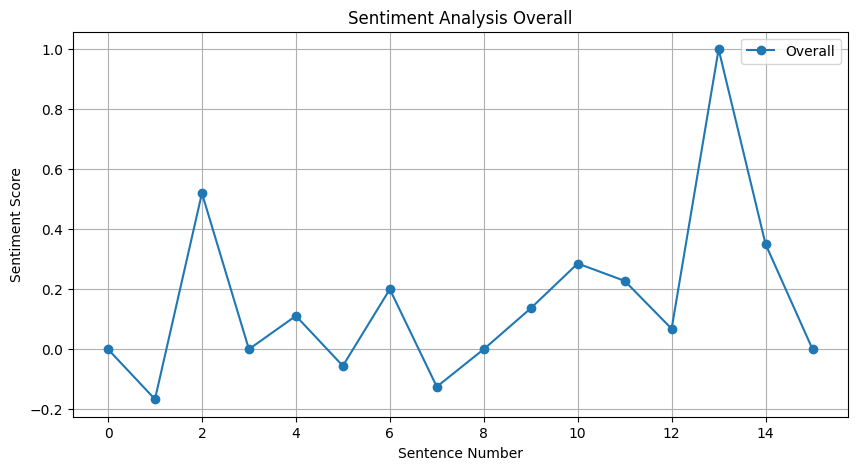

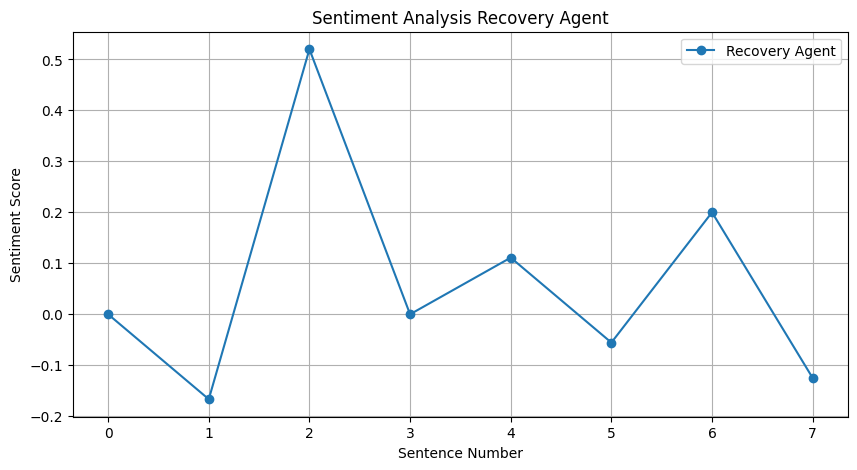

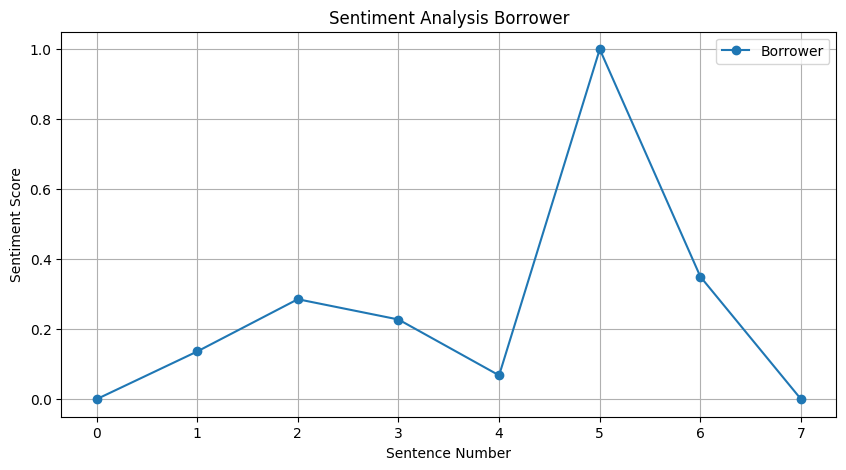

In [31]:
sentiment_analyze()

# Overall Sentiment Analysis

### Recovery Agent:

**Overall Tone**: Firm but understanding.

**Beginning**: The agent starts politely but directly addresses the missed payment, highlighting its importance ("आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है"). This indicates their responsibility to collect the payment.

**Middle**: Upon hearing Mr. Kumar's situation, the agent displays empathy ("हम समझते हैं आपकी स्थिति") and negotiates a feasible payment plan. This suggests a willingness to find solutions and maintain a positive customer relationship.

**End**: The agent concludes positively, thanking Mr. Kumar for his understanding and encouraging open communication ("अगर कोई और सवाल हो तो मुझे बताइएगा"). This reinforces their helpful approach.

### Borrower:

**Overall Tone**: Concerned but cooperative.

**Beginning**: Mr. Kumar acknowledges the call and honestly explains his financial difficulty ("मेरी नौकरी चली गई है"). His tone suggests worry about the situation.

**Middle**: While requesting time, he acknowledges the importance of repayment ("मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं"). This shows his sincerity and intention to fulfill his obligation.

**End**: Mr. Kumar agrees to the payment plan and expresses gratitude for the agent's understanding ("धन्यवाद आपके समझने के लिए"). This relief reflects his hopefulness in resolving the situation soon.